# This is our strokes data collection and testing file. Please note we cannot uploade the huge dataset in submission so reading the files is not possible here. We can show demo in our system if needed. Also, this training takes a lot of time on PCs, and needs GPUs for training

# downloading data

# do not run these cells as this will downloads 20+GBs of data!!! and will be prolematic for session as it spins multiple kernels 

In [6]:
# download data
import xml.etree.ElementTree as ET
import requests
import os
import concurrent.futures

def fetch_xml(xml_url):
    response = requests.get(xml_url)
    if response.status_code != 200:
        print(f"Failed to fetch XML: {response.status_code}")
        return None
    return response.content

def parse_xml(xml_content): # pasring wbaever files we get form url where dataa is hosted
    root = ET.fromstring(xml_content)
    namespace={'s3': 'http://doc.s3.amazonaws.com/2006-03-01'}
    base_url="https://storage.googleapis.com/quickdraw_dataset/"
    file_urls=[]
    for content in root.findall(".//s3:Contents", namespace):
        key=content.find("s3:Key", namespace).text
        if key.startswith("sketchrnn/") and key.endswith(".npz") and not key.endswith(".full.npz"): # npz files is what hold seq data
            file_urls.append(base_url + key)
    return file_urls
def download_file(file_url, download_folder): # donwload func
    file_path=os.path.join(download_folder, os.path.basename(file_url))
    if os.path.exists(file_path):
        print(f"Already exists: {file_path}")
        return
    print(f" Downloading: {file_url}")
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path,"wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {file_url}")

def download_npy_files(xml_url, download_folder):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)
    xml_content = fetch_xml(xml_url)
    if xml_content is None:
        return
    file_urls = parse_xml(xml_content)
    # as data and files numbers is large, using threads to download multiple files in parallel 
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(lambda url: download_file(url, download_folder), file_urls)


In [2]:
xml_url = "https://storage.googleapis.com/quickdraw_dataset?prefix=sketchrnn/"
xml_content = fetch_xml(xml_url)
file_urls = parse_xml(xml_content)

In [3]:
import pandas as pd
import numpy as np
files_to_get=pd.read_excel('data_excel_list.xlsx')
files_to_get=files_to_get[files_to_get['keep130']==1]
file_urls_s=pd.Series(file_urls)
file_urls_s=file_urls_s.str[59:]
file_urls_s=file_urls_s.str.replace('.npz','')
file_urls_s=pd.Series(file_urls)[file_urls_s[file_urls_s.isin(files_to_get.name)].index]
print(len(file_urls_s))
file_urls=file_urls_s.to_list()

130


In [7]:
xml_url = "https://storage.googleapis.com/quickdraw_dataset?prefix=sketchrnn/"
download_folder = "strokes_data2"
count=0
for url in file_urls:
    count=count+1
    download_file(url, download_folder)
    print(count)
    

 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/airplane.npz
1
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/alarm clock.npz
2
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/ambulance.npz
3
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/ant.npz
4
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/apple.npz
5
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/arm.npz
6
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/backpack.npz
7
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/banana.npz
8
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/barn.npz
9
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/baseball bat.npz
10
 Downloading: https://storage.googleapis.com/quickdraw_dataset/sketchrnn/baseball.npz
11
 Downloading: https://storage.googleapis.

In [36]:
os.path.exists("/Users/aryanagarwal/Desktop/cv/project/strokes_data2/.DS_Store")

True

In [238]:
pd.Series(files)[pd.Series(files)=='flower.npz']

90    flower.npz
dtype: object

# sample lot of strokes data. It took us a while to get right combination of data featching to pot these figures


flower.npz


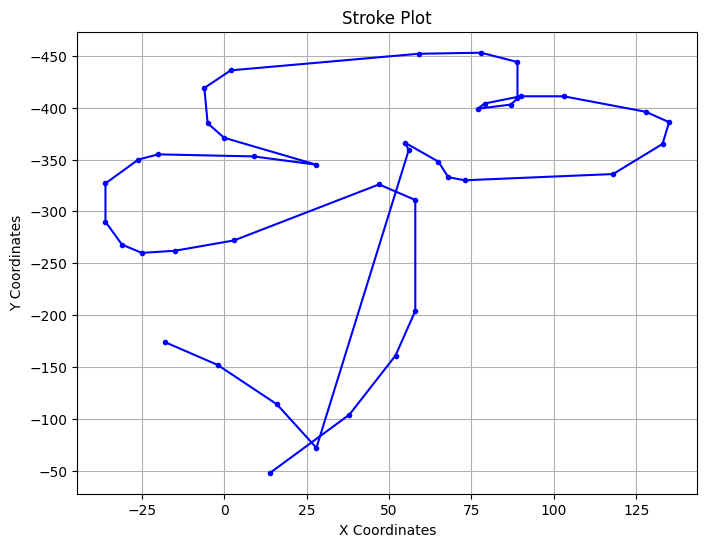

In [242]:

import matplotlib.pyplot as plt
i=90
print(files[i])
strokes=features[i][700]
plt.figure(figsize=(8, 6))
plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue')  
plt.gca().invert_yaxis() #had to invert image
plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
i=80
print(files[labels2[i].argmax()][10:-4])
strokes=samples_array[i]
plt.figure(figsize=(8, 6))
plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue')  
plt.gca().invert_yaxis()
plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()


# what we drew is shown in next cell and overlal inference code is below

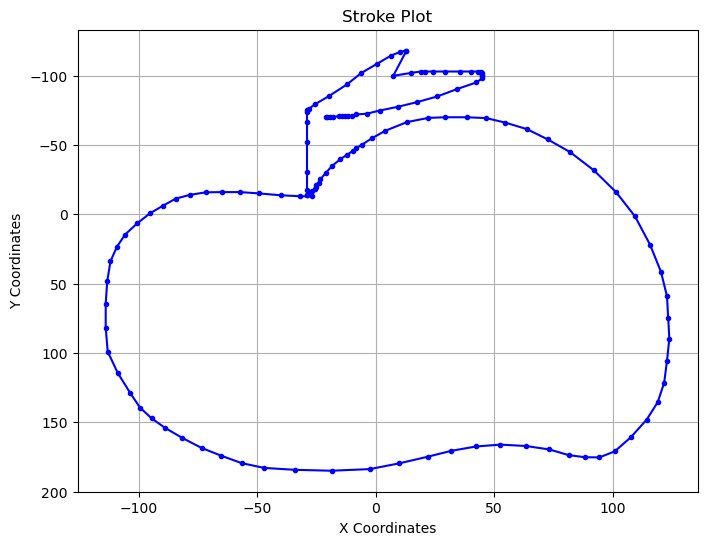

In [341]:
# i=0
# print(files[labels2[i].argmax()][10:-4])
strokes=reduced_stroke_data
# Create a new plot
plt.figure(figsize=(8, 6))

# Plot each stroke
plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue')  # You can change the color if needed
plt.gca().invert_yaxis()
# Set plot attributes
plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Show the plot
plt.grid(True)
plt.show()


In [357]:
import pandas as pd
pd.Series(labels[0][:,0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
69995    0.0
69996    0.0
69997    0.0
69998    0.0
69999    0.0
Length: 70000, dtype: float32

In [346]:
labels2[labels2.argmax()==7]

array([], shape=(0, 700000, 10), dtype=float32)

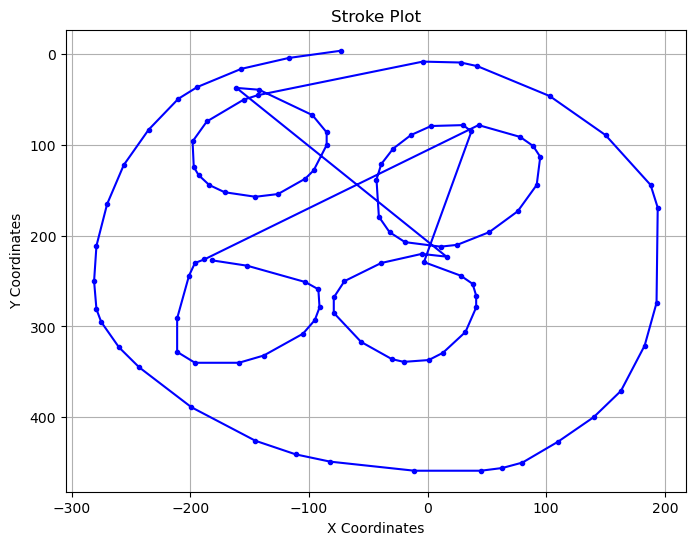

1/1 [==============================] - 0s 13ms/step
0.42322165 sketchrnn_cookie.npz


In [387]:
class_num=0
image_num=100
# print(files[labels2[i].argmax()][10:-4])
strokes=features[class_num][image_num]
# Create a new plot
plt.figure(figsize=(8, 6))

# Plot each stroke
plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue')  # You can change the color if needed
plt.gca().invert_yaxis()
# Set plot attributes
plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Show the plot
plt.grid(True)
plt.show()
pre=lstm_model.predict(pad_sequences(features[class_num][image_num].T, maxlen=max_strokes, padding='post', dtype='float32').reshape(130,3).reshape(1,130,3))
pre=pre[0]
print(pre.max(),files[pre.argmax()])

# Inference on colab models

In [4]:
pip install tensorflow==2.18.0

  Obtaining dependency information for tensorflow==2.18.0 from https://files.pythonhosted.org/packages/26/08/556c4159675c1a30e077ec2a942eeeb81b457cc35c247a5b4a59a1274f05/tensorflow-2.18.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/f6/d4/349f7f4bd5ea92dab34f5bb0fe31775ef6c311427a14d5a5b31ecb442341/absl_py-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61

In [9]:
pip install keras==3.8.0

  Obtaining dependency information for keras==3.8.0 from https://files.pythonhosted.org/packages/fe/cf/aea9087c4d7fafe956a0cc0ff6c3327d10fb8442cda50f992a2186921fa0/keras-3.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.2 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy pandas scikit-learn pygame

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/52/11/9eac327a38834f162b8250aab32a6781339c69afe7574368fffe46387edf/pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/83/47/6edf2f890139616b3219be9cfcc8f0cb8f42eb15efd59597927e390538cb/pygame-2.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022

In [ ]:
# run in new_env_tf environment as keeping keras version and tf verison separate as its needed in my llm assignemnt

In [1]:
import tensorflow as tf

model_path='/Users/aryanagarwal/Downloads/lstm_model_final.keras'

from tensorflow.keras.models import load_model
lstm_model_final=tf.keras.models.load_model(model_path)



In [2]:
import numpy as np
import os
import pickle
files = os.listdir("/Users/aryanagarwal/Desktop/cv/project/strokes_data2")

In [3]:
import pandas as pd
files=pd.read_csv('/Users/aryanagarwal/Downloads/files_class_name_order.csv')
files=files.iloc[:,0].to_list()
max_strokes=243

In [224]:
import pygame
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
# using pygame to fdraw strokes
pygame.init()
WIDTH,HEIGHT=500, 550 # width and dim of canvas
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Draw Here")
WHITE=(255, 255, 255)
BLACK=(0, 0, 0)
GREEN=(0, 255, 0)
RED=(255, 0, 0)
BUTTON_WIDTH, BUTTON_HEIGHT = 100, 40
button_rect = pygame.Rect((WIDTH // 2 - BUTTON_WIDTH // 2, HEIGHT - BUTTON_HEIGHT - 10), (BUTTON_WIDTH, BUTTON_HEIGHT))

# main draw function
def draw_button():
    pygame.draw.rect(screen, GREEN, button_rect)
    font=pygame.font.SysFont(None, 36)
    text=font.render('Submit', True, BLACK)
    screen.blit(text,(button_rect.x + 10, button_rect.y + 5))

# collecting stroks
def collect_strokes():
    running = True
    drawing = False
    strokes = []
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                if button_rect.collidepoint(event.pos):
                    running = False  # clicked submi so stop
                else:
                    drawing = True
            elif event.type == pygame.MOUSEBUTTONUP:
                drawing = False
                if not button_rect.collidepoint(event.pos):  
                    strokes.append([event.pos[0], event.pos[1], 1])   # pen lift
            elif event.type == pygame.MOUSEMOTION and drawing:
                strokes.append([event.pos[0], event.pos[1], 0]) 
        screen.fill(WHITE)

        if len(strokes) > 1:
            for i in range(1, len(strokes)):
                if strokes[i][2] == 0: 
                    pygame.draw.line(screen, BLACK, (strokes[i-1][0], strokes[i-1][1]), (strokes[i][0], strokes[i][1]), 2)

        # sumbint buttn drew
        draw_button()
        pygame.display.flip()

    pygame.quit()
    return strokes

stroke_data=collect_strokes()
# need final data i tensor
stroke_data=np.array(stroke_data)

# mean and center
stroke_data[:,0]=stroke_data[:,0]-stroke_data[:,0].mean()
stroke_data[:,1]=stroke_data[:,1]-stroke_data[:,1].mean()
from scipy.interpolate import interp1d
def reduce_strokes(stroke_data, target_length=130): # default taken 130 , but useing max_len_strpkes
    total_points=len(stroke_data)
    x=stroke_data[:,0]
    y=stroke_data[:,1]
    pen_up=stroke_data[:,2]

    #interpolate to reduce strokes as model has limited number of max strokes as input size
    interp_x=interp1d(np.linspace(0,1,total_points),x,kind='linear')
    interp_y=interp1d(np.linspace(0,1,total_points),y,kind='linear')
    interp_pen=interp1d(np.linspace(0,1,total_points),pen_up,kind='nearest') 

    new_indices=np.linspace(0,1,target_length)
    reduced_x=interp_x(new_indices)
    reduced_y=interp_y(new_indices)
    reduced_pen=interp_pen(new_indices)
    reduced_strokes=np.column_stack((reduced_x, reduced_y, reduced_pen))
    return reduced_strokes


stroke_data=np.array(stroke_data)
print(f"Total number of strokes collected: {len(stroke_data)}")
reduced_stroke_data=reduce_strokes(stroke_data,target_length=max_strokes)
X=pad_sequences([reduced_stroke_data], maxlen=max_strokes, padding='post', dtype='float32')
X=np.array(X)
probas=lstm_model_final.predict(X)[0]
print('proba:',probas.max(),'class:',files[probas.argmax()])
v=pd.DataFrame(files)
v['proba']=pd.Series(probas)
v.columns=['class','proba']
v=v.sort_values(by='proba',ascending=False)
v['proba2']=v['proba'].round(3)
# v.head(5)

Total number of strokes collected: 101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
proba: 0.7681042 class: bush.npz


class     proba  proba2
6     bush.npz  0.768104   0.768
11    tree.npz  0.193722   0.194
0   flower.npz  0.034132   0.034
44    crab.npz  0.001296   0.001
12     cow.npz  0.000897   0.001

In [243]:
pygame.init()
pygame.quit()

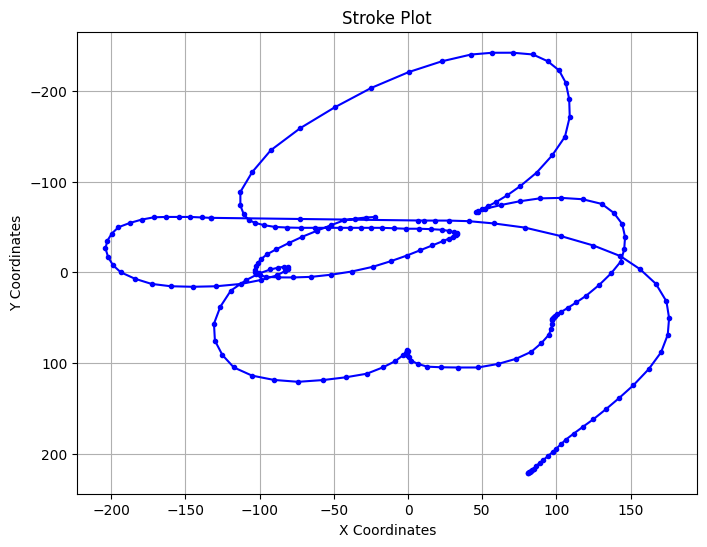

In [197]:
# i=0
# print(files[labels2[i].argmax()][10:-4])
strokes=reduced_stroke_data

plt.figure(figsize=(8, 6))

plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue') 
plt.gca().invert_yaxis()
plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()


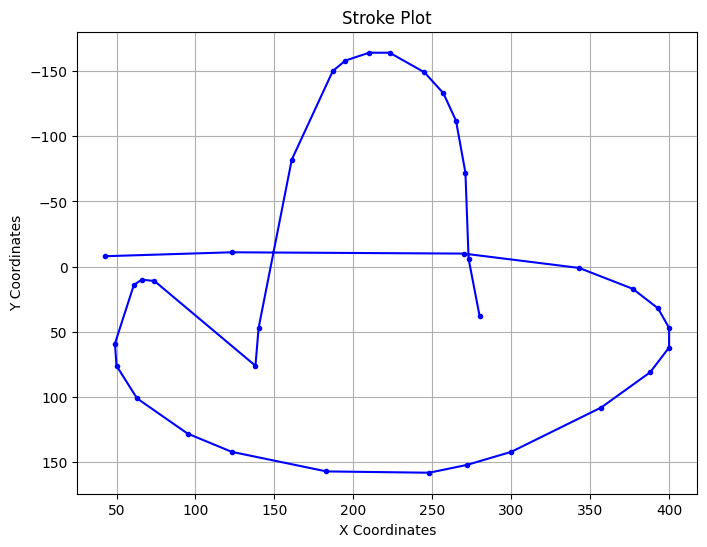

In [136]:
import matplotlib.pyplot as plt
i=90
strokes=features[15][10]
plt.figure(figsize=(8, 6))
plt.plot(strokes[:,0],strokes[:,1],'.-' ,color='blue')
plt.gca().invert_yaxis()

plt.title('Stroke Plot')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.show()


In [202]:
import shutil
for file in files:
    shutil.copyfile(f'/Users/aryanagarwal/Desktop/cv/project/strokes_data2/{file}', f'/Users/aryanagarwal/Desktop/cv/project/strokes_data3/{file}')